<a href="https://colab.research.google.com/github/rosiekwon/smart_healthcare/blob/main/WEEK%205/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM을 활용한 주가 예측 모델

- FinanceDataReader를 활용하여 주가 데이터 받아오기
- TensorFlow Dataset 클래스를 활용하여 주가 데이터 구축
- LSTM 을 활용한 주가 예측 모델 구축

## 필요한 모듈 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15, 20)

plt.rcParams['font.family'] = 'NanumGothic'

## 데이터 (FinanceDataReader)

**FinanceDataReader**는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지

- [GitHub Repo](https://github.com/FinanceData/FinanceDataReader)

**FinanceDataReader**설치

In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import FinanceDataReader as fdr

In [4]:
Tesla = fdr.DataReader('TSLA')
Nvidia = fdr.DataReader('NVDA')
Amazon = fdr.DataReader('AMZN')


**시작**과 **끝** 날짜를 지정하여 범위 데이터 출력

fdr.DataReader(stockcode , '1980-01-01', '2019-12-30')

매우 편리하게 주가 데이터를 `DataFrame`형식으로 출력 (기본 **오름차순 정렬**)

### 컬럼 설명

- `Open`:   시가
- `High`:   고가
- `Low`:    저가
- `Close`:  종가
- `Volume`: 거래량
- `Change`: 대비

In [5]:
Tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800
2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69039900


In [6]:
#데이터 값의 특징 확인
Tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3.107000e+03
mean,57.240981,58.527524,55.847692,57.221600,57.221600,9.331721e+07
std,95.251575,97.449834,92.806073,95.159234,95.159234,8.205735e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,8.346000,8.480000,8.087000,8.274667,8.274667,4.185570e+07
50%,16.087999,16.309999,15.768667,16.099333,16.099333,7.544250e+07
75%,23.829333,24.296000,23.466667,23.807667,23.807667,1.171492e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [7]:
Tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
               '2022-10-21', '2022-10-24', '2022-10-25', '2022-10-26',
               '2022-10-27', '2022-10-28'],
              dtype='datetime64[ns]', name='Date', length=3107, freq=None)

In [8]:
Nvidia.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-24,125.080002,127.099998,120.639999,125.989998,125.989998,51745700
2022-10-25,126.940002,133.000000,126.639999,132.610001,132.610001,50548200
2022-10-26,128.690002,133.880005,127.080002,128.960007,128.960007,53295300
2022-10-27,136.300003,138.380005,131.220001,131.759995,131.759995,58311300
2022-10-28,131.039993,138.500000,130.610001,138.339996,138.339996,52055500


In [9]:
Amazon.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-24,119.980003,120.389999,116.570000,119.820000,119.820000,49531500
2022-10-25,119.650002,121.320000,118.949997,120.599998,120.599998,50934600
2022-10-26,116.000000,119.349998,114.760002,115.660004,115.660004,68802300
2022-10-27,113.919998,114.120003,109.769997,110.959999,110.959999,129605400
2022-10-28,97.910004,103.959999,97.660004,103.410004,103.410004,222855500


## Index 수정 작업



In [11]:
Tesla['Year'] = Tesla.index.year
Tesla['Month'] = Tesla.index.month
Tesla['Day'] = Tesla.index.day

In [12]:
Tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Date,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,2010,6,29
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,2010,6,30
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,2010,7,1
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,2010,7,2
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,2010,7,6


## 시각화

Text(0, 0.5, 'price')

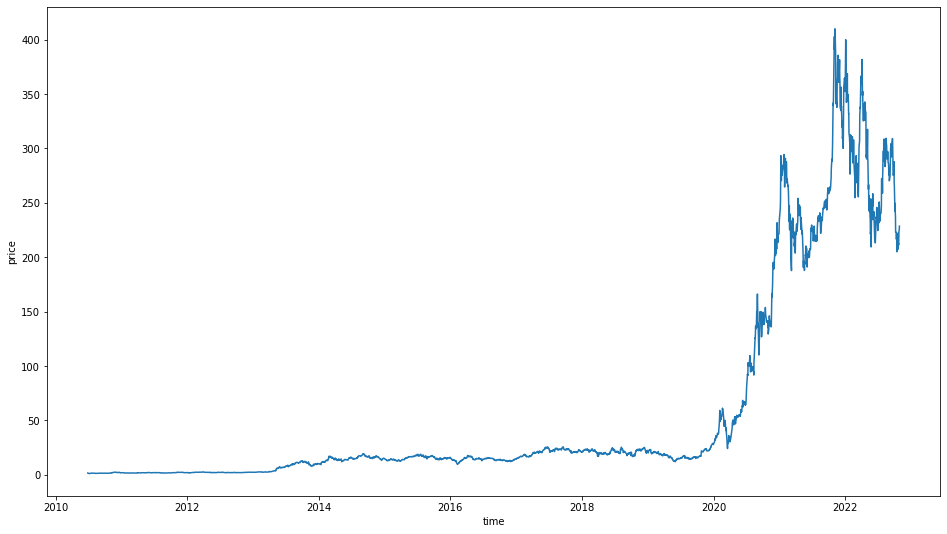

In [13]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=Tesla['Close'], x=Tesla.index)
plt.xlabel('time')
plt.ylabel('price')

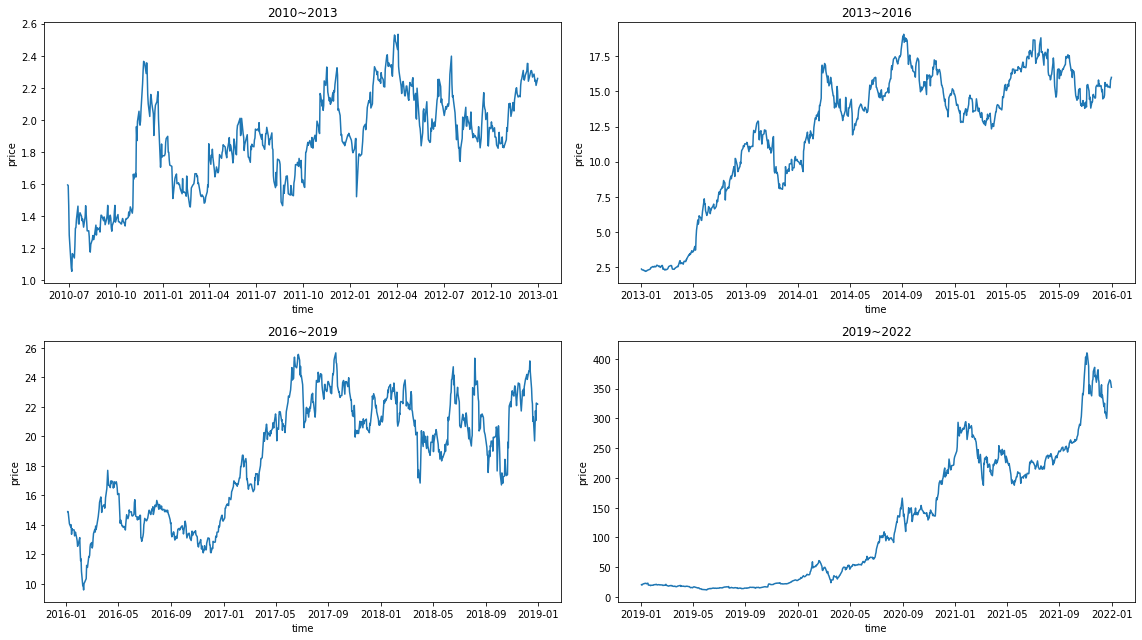

In [17]:
time_steps = [['2010', '2013'],
              ['2013', '2016'],
              ['2016', '2019'],
              ['2019', '2022']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = Tesla.loc[(Tesla.index > time_steps[i][0]) & (Tesla.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## 데이터 전처리

주가 데이터에 대하여 딥러닝 모델이 더 잘 학습할 수 있도록 **정규화(Normalization)** 진행


스케일이 완료된 column으로 새로운 데이터프레임을 생성

**시간 순으로 정렬**, datetime index는 제외



In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

Tesla_scaled = scaler.fit_transform(Tesla[scale_cols])
Tesla_scaled

array([[4.64594998e-04, 1.34982145e-03, 4.21743268e-04, 1.31893376e-03,
        3.06604867e-01],
       [1.56759845e-03, 2.22389858e-03, 1.37066933e-03, 1.30915182e-03,
        2.80639852e-01],
       [1.43926811e-03, 1.49818812e-03, 8.71494681e-04, 1.00428041e-03,
        1.33184151e-01],
       ...,
       [5.31986319e-01, 5.55147549e-01, 5.36739589e-01, 5.46778069e-01,
        9.12359854e-02],
       [5.57254744e-01, 5.62912632e-01, 5.48230512e-01, 5.47878530e-01,
        6.56154825e-02],
       [5.46606416e-01, 5.50938417e-01, 5.32167962e-01, 5.56266567e-01,
        7.37280152e-02]])

In [20]:
Tesla = pd.DataFrame(Tesla_scaled, columns=scale_cols)
Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3107 non-null   float64
 1   High    3107 non-null   float64
 2   Low     3107 non-null   float64
 3   Close   3107 non-null   float64
 4   Volume  3107 non-null   float64
dtypes: float64(5)
memory usage: 121.5 KB


In [21]:
Nvidia_scaled = scaler.fit_transform(Nvidia[scale_cols])

Nvidia = pd.DataFrame(Nvidia_scaled, columns=scale_cols)
Nvidia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5983 non-null   float64
 1   High    5983 non-null   float64
 2   Low     5983 non-null   float64
 3   Close   5983 non-null   float64
 4   Volume  5983 non-null   float64
dtypes: float64(5)
memory usage: 233.8 KB


In [22]:
Amazon_scaled = scaler.fit_transform(Amazon[scale_cols])

Amazon = pd.DataFrame(Amazon_scaled, columns=scale_cols)
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6408 non-null   float64
 1   High    6408 non-null   float64
 2   Low     6408 non-null   float64
 3   Close   6408 non-null   float64
 4   Volume  6408 non-null   float64
dtypes: float64(5)
memory usage: 250.4 KB


## train / test 분할

In [23]:
from sklearn.model_selection import train_test_split as tts

In [24]:
Tesla_xtrain, Tesla_xtest, Tesla_ytrain, Tesla_ytest = tts(Tesla.drop('Close', 1), Tesla['Close'], test_size=0.2, random_state=0, shuffle=False)
Nvidia_xtrain, Nvidia_xtest, Nvidia_ytrain, Nvidia_ytest = tts(Nvidia.drop('Close', 1), Nvidia['Close'], test_size=0.2, random_state=0, shuffle=False)
Amazon_xtrain, Amazon_xtest, Amazon_ytrain, Amazon_ytest = tts(Amazon.drop('Close', 1), Amazon['Close'], test_size=0.2, random_state=0, shuffle=False)

In [25]:
Amazon_xtrain.shape, Amazon_xtrain.shape

((5126, 4), (5126, 4))

In [26]:
Amazon_ytest.shape, Amazon_ytest.shape

((1282,), (1282,))

In [27]:
Amazon_xtrain

,Open,High,Low,Volume
0,0.000276,0.000279,0.000166,0.690172
1,0.000150,0.000141,0.000107,0.136869
2,0.000095,0.000086,0.000085,0.054117
3,0.000086,0.000080,0.000087,0.047957
4,0.000061,0.000052,0.000017,0.176865
...,...,...,...,...
5121,0.259281,0.258075,0.260006,0.023127
5122,0.259153,0.257250,0.259968,0.017819
5123,0.256401,0.255635,0.257912,0.020749
5124,0.253275,0.251343,0.252086,0.044652


## TensroFlow Dataset을 활용한 시퀀스 데이터셋 구성

In [28]:
import tensorflow as tf

In [29]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

Hyperparameter 정의

In [30]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [33]:
Teslatrain_data = windowed_dataset(Tesla_ytrain, WINDOW_SIZE, BATCH_SIZE, True)
Teslatest_data = windowed_dataset(Tesla_ytest, WINDOW_SIZE, BATCH_SIZE, False)

In [34]:
Nvidiatrain_data = windowed_dataset(Nvidia_ytrain, WINDOW_SIZE, BATCH_SIZE, True)
Nvidiatest_data = windowed_dataset(Nvidia_ytest, WINDOW_SIZE, BATCH_SIZE, False)

In [35]:
Amazontrain_data = windowed_dataset(Amazon_ytrain, WINDOW_SIZE, BATCH_SIZE, True)
Amazontest_data = windowed_dataset(Amazon_ytest, WINDOW_SIZE, BATCH_SIZE, False)

In [36]:
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in Teslatrain_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


## 모델

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Conv1D(filters=32, kernel_size=5,
           padding='causal',
           activation='relu',
           input_shape=[WINDOW_SIZE, 1]),
    
    LSTM(16, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1)
])

In [38]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse']) #mean squared error

In [39]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)


In [41]:
Tesla_history = model.fit(Teslatrain_data, 
                    validation_data=(Teslatest_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
     73/Unknown - 1s 11ms/step - loss: 3.4265e-06 - mse: 6.8529e-06
Epoch 1: val_loss did not improve from 0.02087
78/78 [==============================] - 1s 17ms/step - loss: 3.4956e-06 - mse: 6.9911e-06 - val_loss: 0.0289 - val_mse: 0.0577
Epoch 2/50
70/78 [=========================>....] - ETA: 0s - loss: 3.2844e-06 - mse: 6.5687e-06
Epoch 2: val_loss did not improve from 0.02087
78/78 [==============================] - 1s 8ms/step - loss: 3.6157e-06 - mse: 7.2314e-06 - val_loss: 0.0297 - val_mse: 0.0593
Epoch 3/50
73/78 [===========================>..] - ETA: 0s - loss: 3.4538e-06 - mse: 6.9077e-06
Epoch 3: val_loss did not improve from 0.02087
78/78 [==============================] - 1s 12ms/step - loss: 3.7015e-06 - mse: 7.4030e-06 - val_loss: 0.0354 - val_mse: 0.0708
Epoch 4/50
72/78 [==========================>...] - ETA: 0s - loss: 6.4469e-06 - mse: 1.2894e-05
Epoch 4: val_loss did not improve from 0.02087
78/78 [==============================] - 1s 13ms/step - los

In [42]:
Nvidia_history = model.fit(Nvidiatrain_data, 
                    validation_data=(Nvidiatest_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    149/Unknown - 1s 7ms/step - loss: 1.0312e-06 - mse: 2.0623e-06
Epoch 1: val_loss improved from 0.02087 to 0.00357, saving model to tmp/ckeckpointer.ckpt
149/149 [==============================] - 1s 9ms/step - loss: 1.0312e-06 - mse: 2.0623e-06 - val_loss: 0.0036 - val_mse: 0.0071
Epoch 2/50
145/149 [============================>.] - ETA: 0s - loss: 7.2213e-07 - mse: 1.4443e-06
Epoch 2: val_loss improved from 0.00357 to 0.00336, saving model to tmp/ckeckpointer.ckpt
149/149 [==============================] - 2s 13ms/step - loss: 7.5228e-07 - mse: 1.5046e-06 - val_loss: 0.0034 - val_mse: 0.0067
Epoch 3/50
140/149 [===========================>..] - ETA: 0s - loss: 6.6347e-07 - mse: 1.3269e-06
Epoch 3: val_loss improved from 0.00336 to 0.00332, saving model to tmp/ckeckpointer.ckpt
149/149 [==============================] - 1s 8ms/step - loss: 7.3880e-07 - mse: 1.4776e-06 - val_loss: 0.0033 - val_mse: 0.0066
Epoch 4/50
148/149 [============================>.] - ETA: 0s - lo

In [43]:
Amazon_history = model.fit(Amazontrain_data, 
                    validation_data=(Amazontest_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    158/Unknown - 1s 7ms/step - loss: 2.6181e-06 - mse: 5.2363e-06
Epoch 1: val_loss improved from 0.00323 to 0.00317, saving model to tmp/ckeckpointer.ckpt
160/160 [==============================] - 19s 120ms/step - loss: 2.6645e-06 - mse: 5.3291e-06 - val_loss: 0.0032 - val_mse: 0.0063
Epoch 2/50
154/160 [===========================>..] - ETA: 0s - loss: 2.0266e-06 - mse: 4.0533e-06
Epoch 2: val_loss improved from 0.00317 to 0.00285, saving model to tmp/ckeckpointer.ckpt
160/160 [==============================] - 1s 8ms/step - loss: 2.0539e-06 - mse: 4.1078e-06 - val_loss: 0.0028 - val_mse: 0.0057
Epoch 3/50
154/160 [===========================>..] - ETA: 0s - loss: 2.0548e-06 - mse: 4.1096e-06
Epoch 3: val_loss did not improve from 0.00285
160/160 [==============================] - 1s 8ms/step - loss: 2.2063e-06 - mse: 4.4127e-06 - val_loss: 0.0034 - val_mse: 0.0067
Epoch 4/50
159/160 [============================>.] - ETA: 0s - loss: 2.1282e-06 - mse: 4.2563e-06
Epoch 4:

저장한 ModelCheckpoint 로드

In [44]:
model.load_weights(filename)

`test_data`를 활용하여 예측 진행

In [45]:
Tesla_pred = model.predict(Teslatest_data)

19/19 [==============================] - 1s 13ms/step


In [46]:
Tesla_pred.shape

(602, 1)

In [50]:
Nvidia_pred = model.predict(Nvidiatest_data)

37/37 [==============================] - 0s 12ms/step


In [51]:
Amazon_pred = model.predict(Amazontest_data)

40/40 [==============================] - 0s 5ms/step


## 예측 데이터 시각화

### 시각화 코드 

y_test 데이터에 **[20:]**으로 슬라이싱

∵ 예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 **앞의 20일은 예측하지 않음**

∴ 20번 째 index와 비교하면 더욱 정확

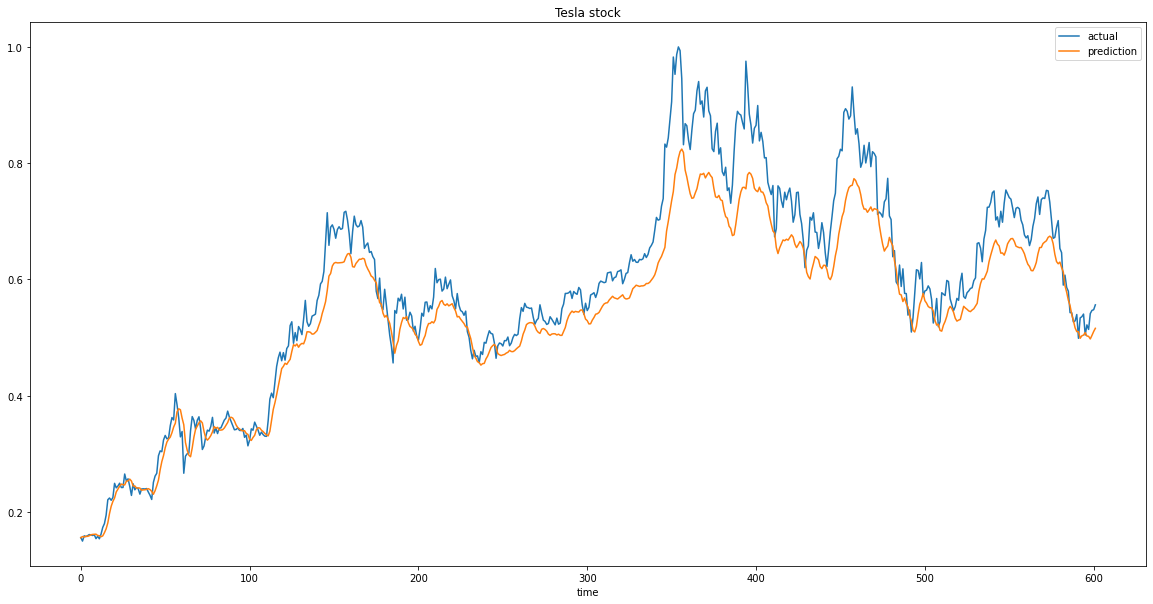

In [56]:
plt.figure(figsize=(20, 10))
plt.plot(np.asarray(Tesla_ytest)[20:], label='actual')
plt.plot(Tesla_pred, label='prediction')
plt.title('Tesla stock')
plt.xlabel('time')
plt.legend()
plt.show()

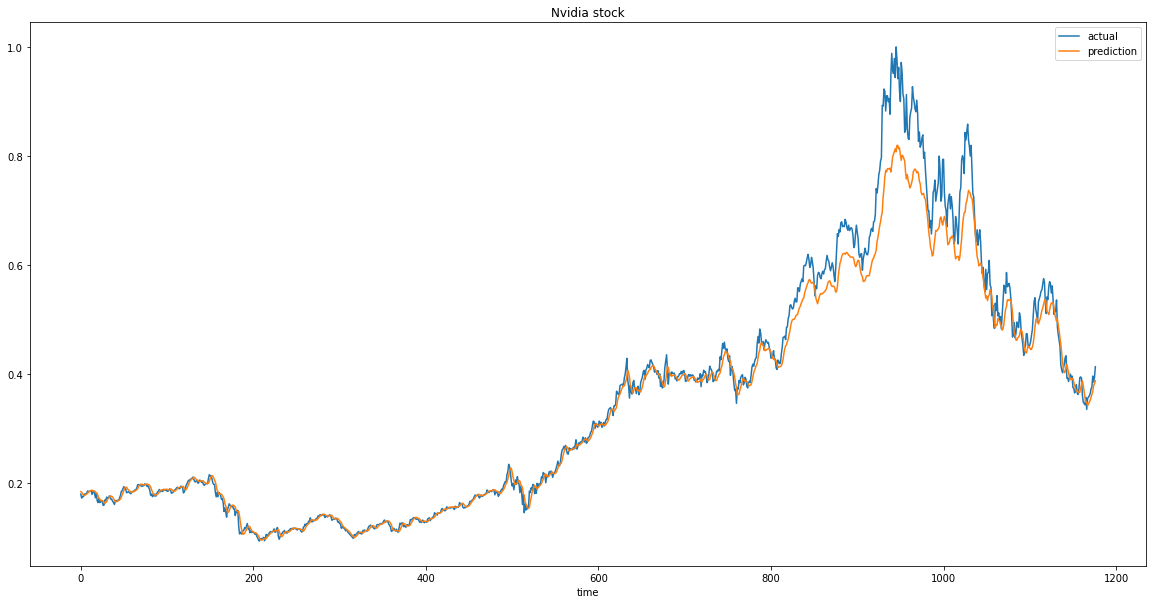

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(np.asarray(Nvidia_ytest)[20:], label='actual')
plt.plot(Nvidia_pred, label='prediction')
plt.title('Nvidia stock')
plt.xlabel('time')
plt.legend()
plt.show()

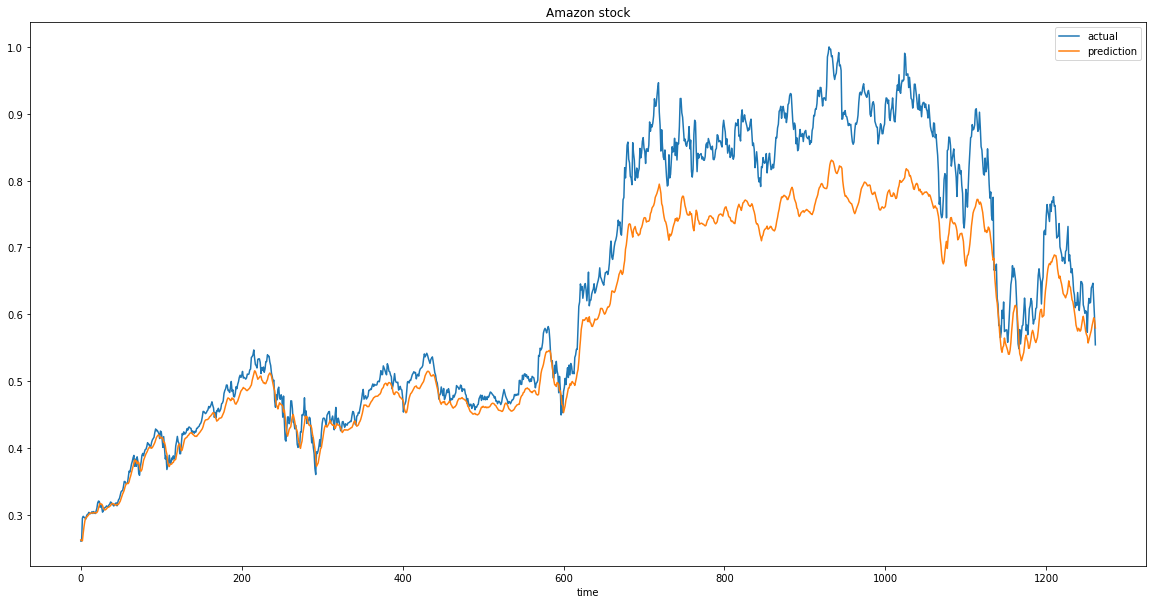

In [57]:
plt.figure(figsize=(20, 10))
plt.plot(np.asarray(Amazon_ytest)[20:], label='actual')
plt.plot(Amazon_pred, label='prediction')
plt.title('Amazon stock')
plt.xlabel('time')
plt.legend()
plt.show()